### MODEL DecisionTree

In [1]:
import  pandas as pd 
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv('Pelabelan Manual.csv')

# Mengatur agar teks panjang tidak terpotong
pd.set_option('display.max_colwidth', None)

# Menampilkan DataFrame
df


,nama_penulis,rating,teks_ulasan,waktu,likes,sentimen
0,Khoirul Misbah,5.0,Baguss,3 years ago,0,Positif
1,Febrian Dwi Purnama,5.0,Rekomendasi Laptop 2nd paling mantap,3 years ago,0,Positif
2,isa setyawan,5.0,"Kualitas laptopnya joss bgt like NEW!!! pemberian garansi 1thn bener"" Sangat membantu dan juga yg terpenting HARGA nya yg JAUH Lebih MURAH dr harga normal tapi kondisi nya masih JOS!!!\nRECOMENDED BANGET POKOK E",10 months ago,0,Positif
3,Auryn Hanselino,5.0,Mantab rekomendasi,a year ago,0,Positif
4,putri zaitun nisa,5.0,"Harga affordable, barang up date pelayanan ok bangettt",2 months ago,0,Positif
...,...,...,...,...,...,...
245,Adiv,5.0,tempatnya nyaman 👍🏻,a month ago,0,Netral
246,Ravido Agasy,5.0,"Recomended banget, tempatnyaa nyaman, pelayanan ramah, dan harga standar sesuai spek, dan bisa negoo",a year ago,0,Netral
247,Mochamad Riyan,5.0,Mantap,2 months ago,0,Netral
248,Pamungkas Sugihartoko,5.0,Koleksi mantab . Harga oke.. pelayanan juosss..,2 years ago,0,Netral


In [5]:
import re

# Fungsi preprocessing teks
def preprocess_teks(teks):
    teks = str(teks).lower()                 # case folding
    teks = re.sub(r'[^a-zA-Z\s]', '', teks)  # hapus angka & tanda baca
    teks = teks.strip()                      # hapus spasi awal & akhir
    return teks

# Menerapkan preprocessing pada kolom teks_ulasan
df['clean_teks'] = df['teks_ulasan'].apply(preprocess_teks)

# Menampilkan hasil
df


,nama_penulis,rating,teks_ulasan,waktu,likes,sentimen,clean_teks
0,Khoirul Misbah,5.0,Baguss,3 years ago,0,Positif,baguss
1,Febrian Dwi Purnama,5.0,Rekomendasi Laptop 2nd paling mantap,3 years ago,0,Positif,rekomendasi laptop nd paling mantap
2,isa setyawan,5.0,"Kualitas laptopnya joss bgt like NEW!!! pemberian garansi 1thn bener"" Sangat membantu dan juga yg terpenting HARGA nya yg JAUH Lebih MURAH dr harga normal tapi kondisi nya masih JOS!!!\nRECOMENDED BANGET POKOK E",10 months ago,0,Positif,kualitas laptopnya joss bgt like new pemberian garansi thn bener sangat membantu dan juga yg terpenting harga nya yg jauh lebih murah dr harga normal tapi kondisi nya masih jos\nrecomended banget pokok e
3,Auryn Hanselino,5.0,Mantab rekomendasi,a year ago,0,Positif,mantab rekomendasi
4,putri zaitun nisa,5.0,"Harga affordable, barang up date pelayanan ok bangettt",2 months ago,0,Positif,harga affordable barang up date pelayanan ok bangettt
...,...,...,...,...,...,...,...
245,Adiv,5.0,tempatnya nyaman 👍🏻,a month ago,0,Netral,tempatnya nyaman
246,Ravido Agasy,5.0,"Recomended banget, tempatnyaa nyaman, pelayanan ramah, dan harga standar sesuai spek, dan bisa negoo",a year ago,0,Netral,recomended banget tempatnyaa nyaman pelayanan ramah dan harga standar sesuai spek dan bisa negoo
247,Mochamad Riyan,5.0,Mantap,2 months ago,0,Netral,mantap
248,Pamungkas Sugihartoko,5.0,Koleksi mantab . Harga oke.. pelayanan juosss..,2 years ago,0,Netral,koleksi mantab harga oke pelayanan juosss


In [7]:
factory =StemmerFactory()
stemmer = factory.create_stemmer()
df['stemmed']=df['clean_teks'].apply(lambda x: stemmer.stem(x))
pd.set_option('display.max_colwidth',None)
df

,nama_penulis,rating,teks_ulasan,waktu,likes,sentimen,clean_teks,stemmed
0,Khoirul Misbah,5.0,Baguss,3 years ago,0,Positif,baguss,baguss
1,Febrian Dwi Purnama,5.0,Rekomendasi Laptop 2nd paling mantap,3 years ago,0,Positif,rekomendasi laptop nd paling mantap,rekomendasi laptop nd paling mantap
2,isa setyawan,5.0,"Kualitas laptopnya joss bgt like NEW!!! pemberian garansi 1thn bener"" Sangat membantu dan juga yg terpenting HARGA nya yg JAUH Lebih MURAH dr harga normal tapi kondisi nya masih JOS!!!\nRECOMENDED BANGET POKOK E",10 months ago,0,Positif,kualitas laptopnya joss bgt like new pemberian garansi thn bener sangat membantu dan juga yg terpenting harga nya yg jauh lebih murah dr harga normal tapi kondisi nya masih jos\nrecomended banget pokok e,kualitas laptop joss bgt like new beri garansi thn bener sangat bantu dan juga yg penting harga nya yg jauh lebih murah dr harga normal tapi kondisi nya masih jos recomended banget pokok e
3,Auryn Hanselino,5.0,Mantab rekomendasi,a year ago,0,Positif,mantab rekomendasi,mantab rekomendasi
4,putri zaitun nisa,5.0,"Harga affordable, barang up date pelayanan ok bangettt",2 months ago,0,Positif,harga affordable barang up date pelayanan ok bangettt,harga affordable barang up date layan ok bangettt
...,...,...,...,...,...,...,...,...
245,Adiv,5.0,tempatnya nyaman 👍🏻,a month ago,0,Netral,tempatnya nyaman,tempat nyaman
246,Ravido Agasy,5.0,"Recomended banget, tempatnyaa nyaman, pelayanan ramah, dan harga standar sesuai spek, dan bisa negoo",a year ago,0,Netral,recomended banget tempatnyaa nyaman pelayanan ramah dan harga standar sesuai spek dan bisa negoo,recomended banget tempatnyaa nyaman layan ramah dan harga standar sesuai spek dan bisa negoo
247,Mochamad Riyan,5.0,Mantap,2 months ago,0,Netral,mantap,mantap
248,Pamungkas Sugihartoko,5.0,Koleksi mantab . Harga oke.. pelayanan juosss..,2 years ago,0,Netral,koleksi mantab harga oke pelayanan juosss,koleksi mantab harga oke layan juosss


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Transform teks menjadi fitur numerik
X = vectorizer.fit_transform(df['stemmed'])

# Label
y = df['sentimen']

# Melihat ukuran matriks TF-IDF
print("Shape TF-IDF :", X.shape)


Shape TF-IDF : (250, 598)


In [12]:
tfidf_df = pd.DataFrame(
    X.toarray(),
    columns=vectorizer.get_feature_names_out()
)

tfidf_df

,ada,adaptor,adik,admin,adminnya,affordable,aftersales,agak,aja,akan,...,works,worth,wrapnya,yakin,yang,yg,yokk,yokkk,youuu,zoom
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.315415,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.399722,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
246,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
247,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
248,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [13]:
# Pembagian Data Train dan Test (split Data)

x_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

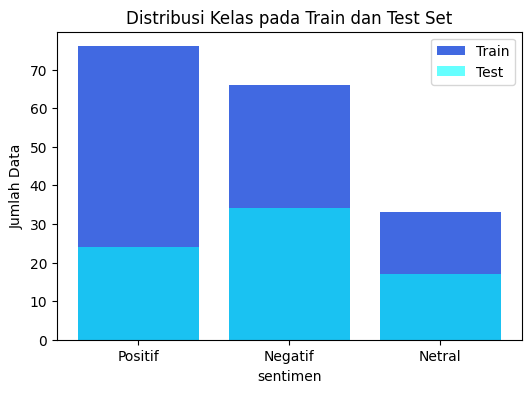

In [14]:
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

plt.figure(figsize=(6,4))
plt.bar(train_counts.index, train_counts.values, 
        color='royalblue', label='Train')
plt.bar(test_counts.index, test_counts.values, 
        color='aqua', alpha=0.6, label='Test')

plt.xlabel("sentimen")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Kelas pada Train dan Test Set")
plt.legend()
plt.show()

In [15]:
# membangun model decision tree

clf = DecisionTreeClassifier(criterion= 'entropy',random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [16]:
#Prediksi dan evaluasi 

y_pred = clf.predict(X_test)
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test, y_pred))
print("Akurasi Model:", accuracy_score(y_test,y_pred))

Confusion Matrix:
 [[24  5  5]
 [ 0 16  1]
 [ 1  4 19]]

Classification Report:
               precision    recall  f1-score   support

     Negatif       0.96      0.71      0.81        34
      Netral       0.64      0.94      0.76        17
     Positif       0.76      0.79      0.78        24

    accuracy                           0.79        75
   macro avg       0.79      0.81      0.78        75
weighted avg       0.82      0.79      0.79        75

Akurasi Model: 0.7866666666666666


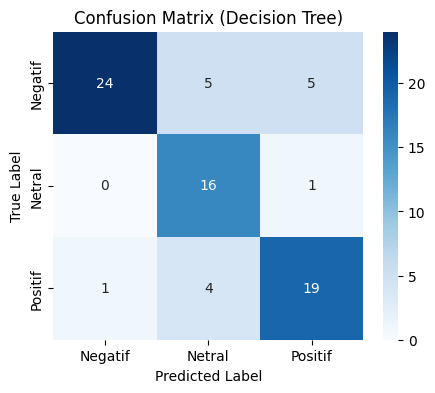

In [18]:
cm = confusion_matrix(y_test, y_pred)
labels = clf.classes_

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

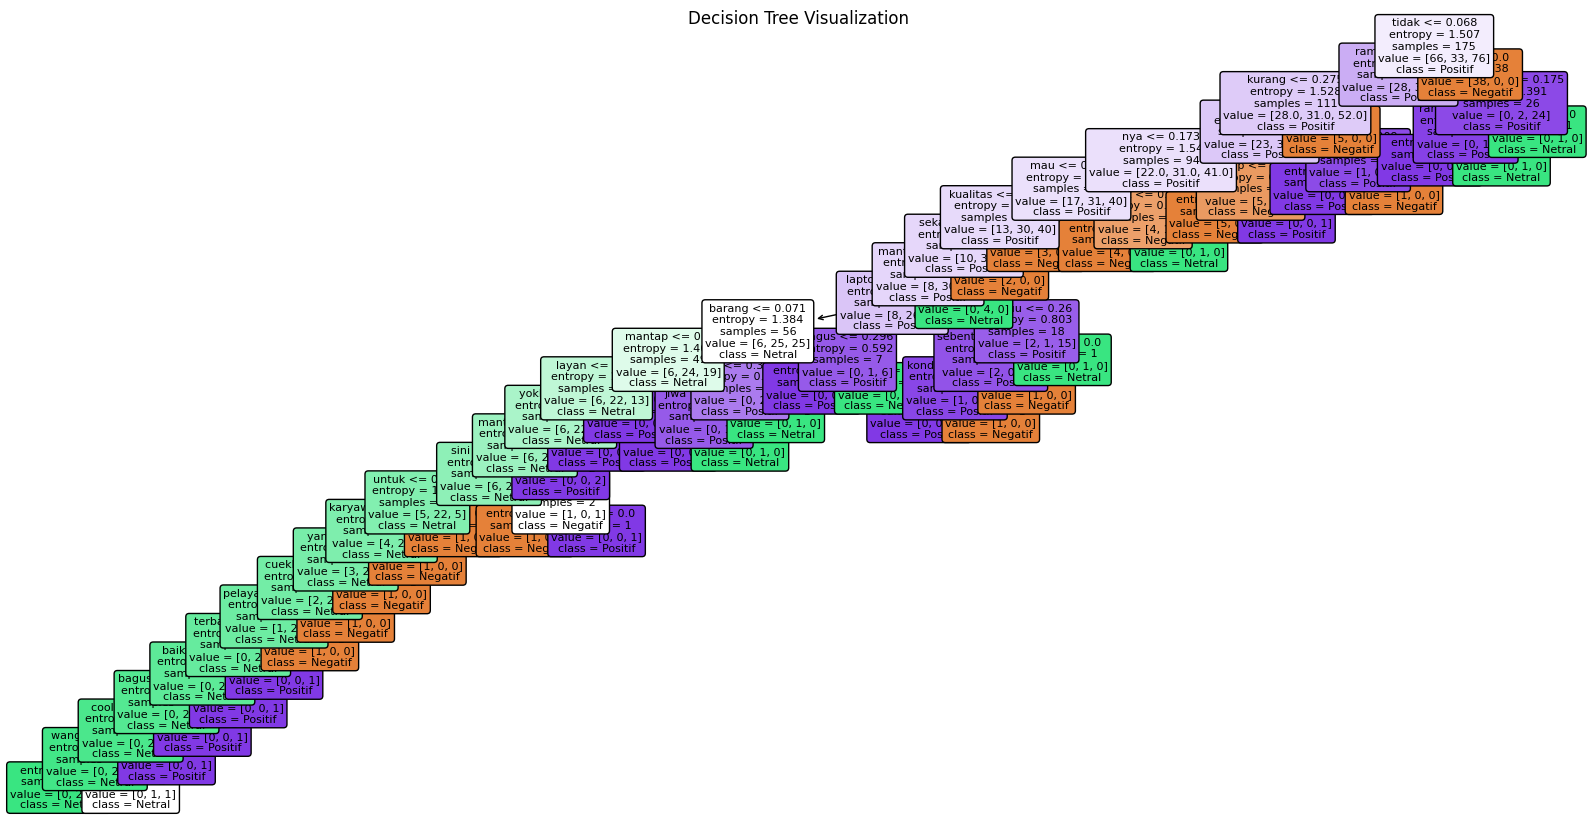

In [19]:
plt.figure(figsize=(20,10))
plot_tree(clf,
          feature_names=vectorizer.get_feature_names_out(),
          class_names=clf.classes_,
          filled=True,
          rounded=True,
          fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()

In [20]:
# PREDIKSI TEKS BARU 
contoh = ["Laptopnya sangat bagus di Herocom",
          "pelayanan nya tidak ramah"]
contoh_clean = [stemmer.stem(preprocess_teks(t)) for t in contoh]
contoh_tfidf = vectorizer.transform(contoh_clean)
pred = clf.predict(contoh_tfidf)
for t, p in zip(contoh, pred):
    print(f"Teks:{t}> prediksi : {p}")

Teks:Laptopnya sangat bagus di Herocom> prediksi : Positif
Teks:pelayanan nya tidak ramah> prediksi : Negatif


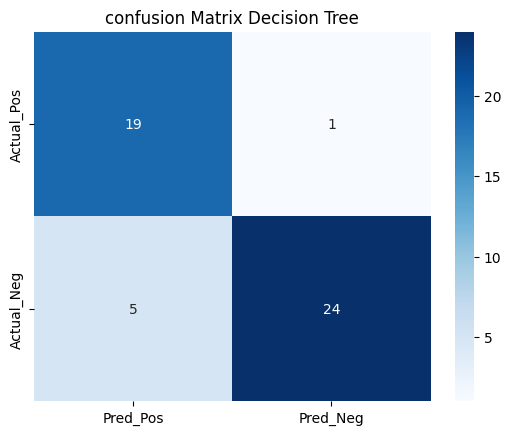

In [21]:
# visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Positif','Negatif'])
sns.heatmap(cm, annot =True, fmt='d', cmap='Blues', 
            xticklabels=['Pred_Pos','Pred_Neg'],
            yticklabels=['Actual_Pos', 'Actual_Neg'])
plt.title('confusion Matrix Decision Tree')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

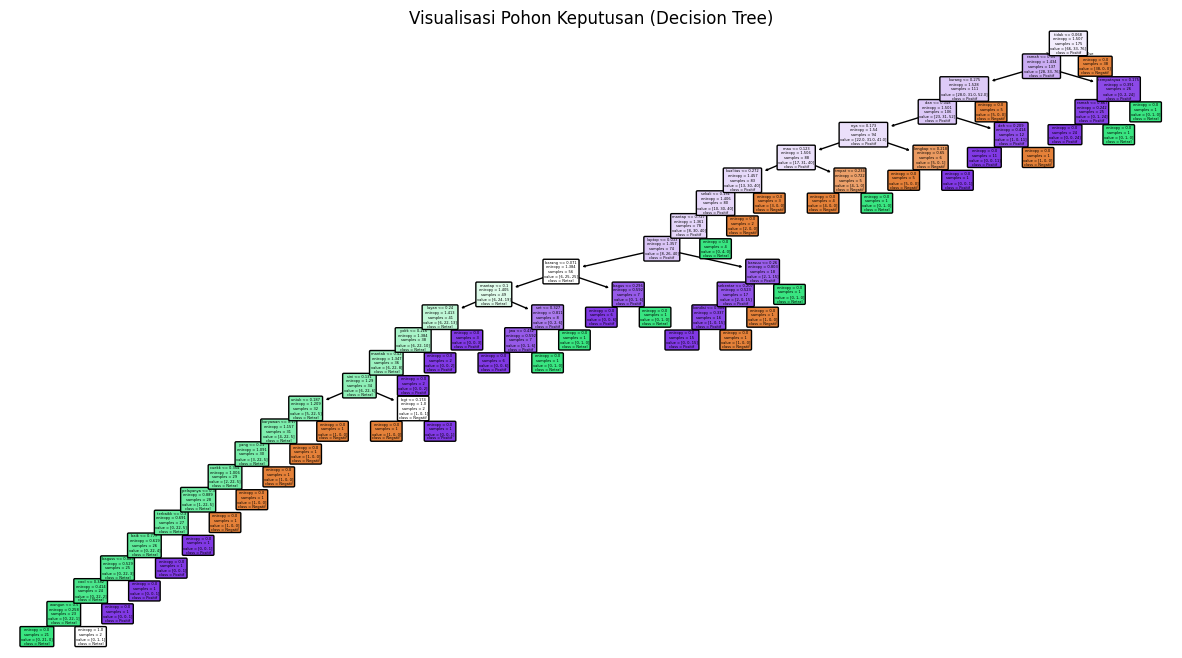

In [22]:
#VISUALISASI STRUKTUR POHON KEPUTUSAN 
plt.figure(figsize=(15,8))
plot_tree(clf,filled=True,feature_names=vectorizer.get_feature_names_out(),class_names=clf.classes_, rounded=True)
plt.title("Visualisasi Pohon Keputusan (Decision Tree)")
plt.show

### MODEL NAIVE BAYES

In [23]:

import pandas as pd
import numpy as np
import re

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt


In [24]:
#  Baca file CSV & bersihkan nama kolom
df = pd.read_csv('Pelabelan Manual.csv')

# rapikan nama kolom supaya konsisten
df.columns = df.columns.str.strip().str.lower()

# tampilkan 5 baris awal & kolom
print("Kolom pada dataset:", df.columns.tolist())
df.head()


Kolom pada dataset: ['nama_penulis', 'rating', 'teks_ulasan', 'waktu', 'likes', 'sentimen']


,nama_penulis,rating,teks_ulasan,waktu,likes,sentimen
0,Khoirul Misbah,5.0,Baguss,3 years ago,0,Positif
1,Febrian Dwi Purnama,5.0,Rekomendasi Laptop 2nd paling mantap,3 years ago,0,Positif
2,isa setyawan,5.0,"Kualitas laptopnya joss bgt like NEW!!! pemberian garansi 1thn bener"" Sangat membantu dan juga yg terpenting HARGA nya yg JAUH Lebih MURAH dr harga normal tapi kondisi nya masih JOS!!!\nRECOMENDED BANGET POKOK E",10 months ago,0,Positif
3,Auryn Hanselino,5.0,Mantab rekomendasi,a year ago,0,Positif
4,putri zaitun nisa,5.0,"Harga affordable, barang up date pelayanan ok bangettt",2 months ago,0,Positif


In [25]:
# drop missing pada kolom penting
# Pastikan kolom yang dipakai ada: nama_penulis, rating, teks_ulasan, waktu, likes, sentimen
expected_cols = ['nama_penulis', 'rating', 'teks_ulasan', 'waktu', 'likes', 'sentimen']
missing = [c for c in expected_cols if c not in df.columns]
if missing:
    print("Peringatan - kolom yang hilang:", missing)
else:
    print("Semua kolom penting ada.")

# Drop baris tanpa teks ulasan atau sentimen
df = df.dropna(subset=['teks_ulasan','sentimen']).reset_index(drop=True)
print("Jumlah baris setelah dropna:", len(df))


Semua kolom penting ada.
Jumlah baris setelah dropna: 250


In [26]:
# Fungsi preprocessing (cleaning) + contoh penerapan
def preprocess_teks(teks):
    teks = str(teks)
    teks = teks.lower()                      
    teks = re.sub(r'http\S+',' ', teks)     
    teks = re.sub(r'[^a-z\s]',' ', teks)     
    teks = re.sub(r'\s+',' ', teks)          
    teks = teks.strip()
    return teks

# terapkan ke kolom teks_ulasan
df['clean_teks'] = df['teks_ulasan'].apply(preprocess_teks)

# contoh
df[['teks_ulasan','clean_teks']].head()


,teks_ulasan,clean_teks
0,Baguss,baguss
1,Rekomendasi Laptop 2nd paling mantap,rekomendasi laptop nd paling mantap
2,"Kualitas laptopnya joss bgt like NEW!!! pemberian garansi 1thn bener"" Sangat membantu dan juga yg terpenting HARGA nya yg JAUH Lebih MURAH dr harga normal tapi kondisi nya masih JOS!!!\nRECOMENDED BANGET POKOK E",kualitas laptopnya joss bgt like new pemberian garansi thn bener sangat membantu dan juga yg terpenting harga nya yg jauh lebih murah dr harga normal tapi kondisi nya masih jos recomended banget pokok e
3,Mantab rekomendasi,mantab rekomendasi
4,"Harga affordable, barang up date pelayanan ok bangettt",harga affordable barang up date pelayanan ok bangettt


In [27]:
# Stemming (Sastrawi) dan stopword removal
factory = StemmerFactory()
stemmer = factory.create_stemmer()

stop_factory = StopWordRemoverFactory()
stopwords = set(stop_factory.get_stop_words())

def stem_and_remove_stopwords(teks):
    teks = str(teks)
    # stemming — Sastrawi bekerja pada kalimat utuh
    stemmed = stemmer.stem(teks)
    # hapus stopwords
    tokens = [w for w in stemmed.split() if w not in stopwords]
    return ' '.join(tokens)

# buat kolom stemmed dan final_teks
df['stemmed'] = df['clean_teks'].apply(lambda x: stemmer.stem(x))
df['final_teks'] = df['stemmed'].apply(lambda x: ' '.join([w for w in x.split() if w not in stopwords]))

# tampilkan contoh
df[['clean_teks','stemmed','final_teks']].head()


,clean_teks,stemmed,final_teks
0,baguss,baguss,baguss
1,rekomendasi laptop nd paling mantap,rekomendasi laptop nd paling mantap,rekomendasi laptop nd paling mantap
2,kualitas laptopnya joss bgt like new pemberian garansi thn bener sangat membantu dan juga yg terpenting harga nya yg jauh lebih murah dr harga normal tapi kondisi nya masih jos recomended banget pokok e,kualitas laptop joss bgt like new beri garansi thn bener sangat bantu dan juga yg penting harga nya yg jauh lebih murah dr harga normal tapi kondisi nya masih jos recomended banget pokok e,kualitas laptop joss bgt like new beri garansi thn bener sangat bantu yg penting harga nya yg jauh lebih murah dr harga normal kondisi nya jos recomended banget pokok e
3,mantab rekomendasi,mantab rekomendasi,mantab rekomendasi
4,harga affordable barang up date pelayanan ok bangettt,harga affordable barang up date layan ok bangettt,harga affordable barang up date layan bangettt


In [28]:
# Siapkan fitur (X) dan target (y)
# Gunakan TF-IDF pada 'final_teks'
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # batasi fitur agar tidak terlalu besar

X = vectorizer.fit_transform(df['final_teks'])

# Encode label (sentimen) jika berupa string (misal 'Positif'/'Negatif')
le = LabelEncoder()
y = le.fit_transform(df['sentimen'].astype(str))  # simpan mapping untuk interpretasi

print("Mapping label:", dict(zip(le.classes_, le.transform(le.classes_))))
print("Shape X:", X.shape)
print("Shape y:", y.shape)


Mapping label: {'Negatif': np.int64(0), 'Netral': np.int64(1), 'Positif': np.int64(2)}
Shape X: (250, 1627)
Shape y: (250,)


In [29]:
# Split data (train/test) dan tampilkan distribusi kelas
RANDOM_STATE = 42
TEST_SIZE = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE
)

# Distribusi kelas pada train & test
train_dist = pd.Series(y_train).value_counts().sort_index()
test_dist  = pd.Series(y_test).value_counts().sort_index()

# Tampilkan dengan label asli
inv_map = {v:k for k,v in dict(zip(le.classes_, le.transform(le.classes_))).items()}
train_dist.index = [le.inverse_transform([i])[0] for i in train_dist.index]
test_dist.index  = [le.inverse_transform([i])[0] for i in test_dist.index]

print("Distribusi kelas - TRAIN:")
print(train_dist)
print("\nDistribusi kelas - TEST:")
print(test_dist)


Distribusi kelas - TRAIN:
Negatif    80
Netral     40
Positif    80
Name: count, dtype: int64

Distribusi kelas - TEST:
Negatif    20
Netral     10
Positif    20
Name: count, dtype: int64


In [31]:
# Training model Naive Bayes (MultinomialNB)
model = MultinomialNB()
model.fit(X_train, y_train)

# Simpan prediksi pada train (opsional) dan test
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)


In [32]:
# Evaluasi - akurasi & classification report
print("=== TRAIN ===")
print("Accuracy (train):", accuracy_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred, target_names=le.classes_))

print("\n=== TEST ===")
print("Accuracy (test):", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, target_names=le.classes_))


=== TRAIN ===
Accuracy (train): 0.88
              precision    recall  f1-score   support

     Negatif       0.95      0.99      0.97        80
      Netral       1.00      0.42      0.60        40
     Positif       0.80      1.00      0.89        80

    accuracy                           0.88       200
   macro avg       0.92      0.80      0.82       200
weighted avg       0.90      0.88      0.86       200


=== TEST ===
Accuracy (test): 0.68
              precision    recall  f1-score   support

     Negatif       0.71      0.75      0.73        20
      Netral       1.00      0.20      0.33        10
     Positif       0.63      0.85      0.72        20

    accuracy                           0.68        50
   macro avg       0.78      0.60      0.60        50
weighted avg       0.74      0.68      0.65        50



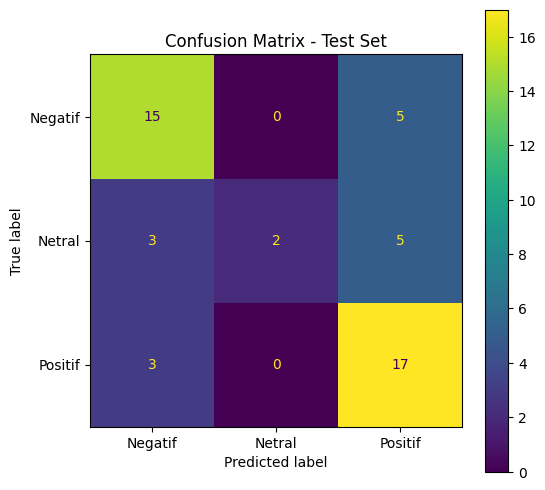

,Negatif,Netral,Positif
Negatif,15,0,5
Netral,3,2,5
Positif,3,0,17


In [33]:
# Confusion matrix (test) - tampilkan dan plot
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax)
plt.title("Confusion Matrix - Test Set")
plt.show()

# Juga tampilkan confusion matrix sebagai DataFrame (lebih mudah dibaca)
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
cm_df


In [34]:
# Contoh prediksi manual pada beberapa sampel & simpan model/vektorizer (opsional)
samples = [
    "saya sangat suka pelayanan nya",
    "kualitas laptopnya sangat bagus walaupun second",
    "pelayanan nya sangat ramah"
]

# preprocess sama pipeline: preprocessing -> stemming -> remove stopwords
def predict_text(texts):
    processed = [preprocess_teks(t) for t in texts]
    stemmed = [stemmer.stem(t) for t in processed]
    final = [' '.join([w for w in s.split() if w not in stopwords]) for s in stemmed]
    Xs = vectorizer.transform(final)
    preds = model.predict(Xs)
    return [le.inverse_transform([p])[0] for p in preds]

print("Prediksi contoh:")
for t,p in zip(samples, predict_text(samples)):
    print(f"- \"{t}\"  ->  {p}")

# (opsional) Simpan model dan vectorizer untuk pemakaian nanti
import joblib
joblib.dump(model, 'nb_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')
joblib.dump(le, 'label_encoder.joblib')
print("Model dan vectorizer disimpan: nb_model.joblib, tfidf_vectorizer.joblib, label_encoder.joblib")


Prediksi contoh:
- "saya sangat suka pelayanan nya"  ->  Negatif
- "kualitas laptopnya sangat bagus walaupun second"  ->  Positif
- "pelayanan nya sangat ramah"  ->  Negatif
Model dan vectorizer disimpan: nb_model.joblib, tfidf_vectorizer.joblib, label_encoder.joblib


In [39]:
print("Tipe Vectorizer :", type(vectorizer))
print("Jumlah fitur (kata) :", len(vectorizer.get_feature_names_out()))


Tipe Vectorizer : <class 'sklearn.feature_extraction.text.TfidfVectorizer'>
Jumlah fitur (kata) : 1627


In [40]:
# ambil semua fitur
feature_names = vectorizer.get_feature_names_out()

# tampilkan 20 fitur pertama
print("20 fitur pertama TF-IDF:")
print(feature_names[:20])


20 fitur pertama TF-IDF:
['adaptor' 'adaptor asli' 'adaptor ori' 'adik' 'adik beli' 'admin'
 'admin gercep' 'admin sama' 'adminnya' 'adminnya fast' 'adminnya slow'
 'adminnya unit' 'affordable' 'affordable barang' 'affordable layan'
 'aftersales' 'aftersales baik' 'aja' 'aja jawab' 'akhir']


In [41]:
# Transform sampel ke TF-IDF
final_samples = []
for t in samples:
    t_clean = preprocess_teks(t)
    t_stem = stemmer.stem(t_clean)
    t_final = ' '.join([w for w in t_stem.split() if w not in stopwords])
    final_samples.append(t_final)

X_sample = vectorizer.transform(final_samples)

# ubah ke DataFrame
tfidf_sample_df = pd.DataFrame(
    X_sample.toarray(),
    columns=vectorizer.get_feature_names_out()
)

tfidf_sample_df


,adaptor,adaptor asli,adaptor ori,adik,adik beli,admin,admin gercep,admin sama,adminnya,adminnya fast,...,yg kaya,yg mau,yg nyari,yg penting,yg tawar,yokk,yokk kesini,yokkk,youuu,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Ambil bobot fitur dari model NB
feature_log_prob = model.feature_log_prob_

nb_df = pd.DataFrame(
    feature_log_prob,
    columns=vectorizer.get_feature_names_out(),
    index=le.classes_
)

nb_df.head()


,adaptor,adaptor asli,adaptor ori,adik,adik beli,admin,admin gercep,admin sama,adminnya,adminnya fast,...,yg kaya,yg mau,yg nyari,yg penting,yg tawar,yokk,yokk kesini,yokkk,youuu,zoom
Negatif,-7.033730,-7.248063,-7.218831,-7.260871,-7.260871,-7.263706,-7.529868,-7.246396,-7.529868,-7.529868,...,-7.529868,-7.529868,-7.529868,-7.529868,-7.529868,-7.529868,-7.529868,-7.529868,-7.529868,-7.324856
Netral,-7.430517,-7.430517,-7.430517,-7.430517,-7.430517,-7.430517,-7.430517,-7.430517,-7.430517,-7.430517,...,-7.430517,-7.430517,-7.430517,-7.430517,-7.430517,-7.430517,-7.430517,-7.430517,-7.430517,-7.430517
Positif,-7.567273,-7.567273,-7.567273,-7.567273,-7.567273,-7.438168,-7.429159,-7.567273,-7.350763,-7.448394,...,-7.434403,-7.443090,-7.314160,-7.314522,-7.407676,-7.079173,-7.079173,-7.079173,-7.435568,-7.567273


In [43]:
def top_words_per_class(nb_df, n=10):
    for label in nb_df.index:
        print(f"\nTop {n} kata untuk sentimen: {label}")
        print(
            nb_df.loc[label]
            .sort_values(ascending=False)
            .head(n)
        )

top_words_per_class(nb_df, n=10)



Top 10 kata untuk sentimen: Negatif
nya         -5.752142
kurang      -6.235458
ramah       -6.245102
laptop      -6.266077
layan       -6.291653
jelek       -6.316394
kualitas    -6.364541
banyak      -6.376659
bagus       -6.472717
layan nya   -6.514164
Name: Negatif, dtype: float64

Top 10 kata untuk sentimen: Netral
bagusss    -6.044223
bagus      -6.130991
mantap     -6.234873
murah      -6.331905
keren      -6.379673
ramah      -6.521096
oke        -6.720850
mantapp    -6.737370
mantaapp   -6.737370
joossss    -6.737370
Name: Netral, dtype: float64

Top 10 kata untuk sentimen: Positif
laptop        -5.916060
layan         -5.999354
ramah         -6.223821
mantap        -6.289331
baik          -6.335459
bagus         -6.407377
banget        -6.457112
barang        -6.462346
harga         -6.478304
rekomendasi   -6.524428
Name: Positif, dtype: float64
